In [1]:
import os
import json
import hoomd
import codecs

import numpy as np

import polychrom_hoomd.log as log
import polychrom_hoomd.build as build
import polychrom_hoomd.forces as forces
import polychrom_hoomd.render as render

from polykit.generators.initial_conformations import grow_cubic

In [2]:
# Generate uniform spherical distribution of 10,000 vertices by Gaussian sampling (https://mathworld.wolfram.com/SpherePointPicking.html)
number_of_vertices = 10000

vertex_positions = np.random.randn(number_of_vertices, 3)
vertex_positions /= np.linalg.norm(vertex_positions, axis=1, keepdims=True)

In [3]:
# Load vertices into HooMD snapshot
snapshot = build.get_simulation_box(box_length=2, pad=0.)

build.set_membrane_vertices(snapshot, vertex_positions)

In [4]:
# Rescale vertex diameters for easier visualization
vertex_rescale_factor = 0.01

snapshot.particles.diameter *= vertex_rescale_factor

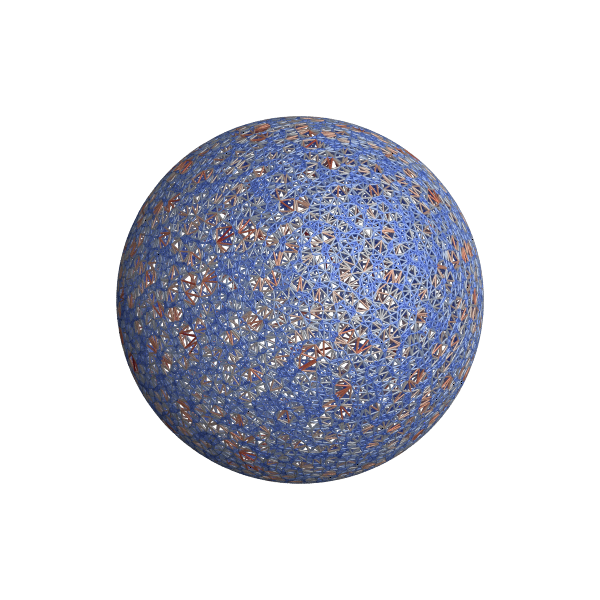

In [5]:
# Visualize the resulting mesh using Fresnel
render.fresnel(snapshot, outline=0, show_strains=True, cmap='coolwarm').static()

In [6]:
# That does not look very homogeneous! 
# Let's try to achieve a more regular mesh by solving the Thomson problem using HooMD (https://en.wikipedia.org/wiki/Thomson_problem)
vertex_positions_thomson = build.get_thomson_distribution(number_of_vertices)

HOOMD is running on the following GPU(s):
[0]           NVIDIA L40S 142 SM_8.9 @ 2.52 GHz, 45596 MiB DRAM
Simulation.timestep  Simulation.tps     Status.etr    Thermo.potential_energy
       5000             72.99752      0:21:41.414122        4.94487e+07      
       10000            83.85136      0:17:53.327804        4.94483e+07      
       15000            88.19263      0:16:03.799393        4.94478e+07      
       20000            90.51898      0:14:43.792514        4.94477e+07      
       25000            91.96500      0:13:35.527634        4.94476e+07      
       30000            92.93794      0:12:33.190802        4.94476e+07      
       35000            93.62696      0:11:34.244454        4.94476e+07      
       40000            94.15904      0:10:37.219730        4.94476e+07      
       45000            94.61903      0:09:41.278403        4.94475e+07      
       50000            94.98423      0:08:46.403181        4.94475e+07      
       55000            95.27770    

In [7]:
# Load vertices into new HooMD snapshot
snapshot_thomson = build.get_simulation_box(box_length=2)

build.set_membrane_vertices(snapshot_thomson, vertex_positions_thomson)
snapshot_thomson.particles.diameter *= vertex_rescale_factor

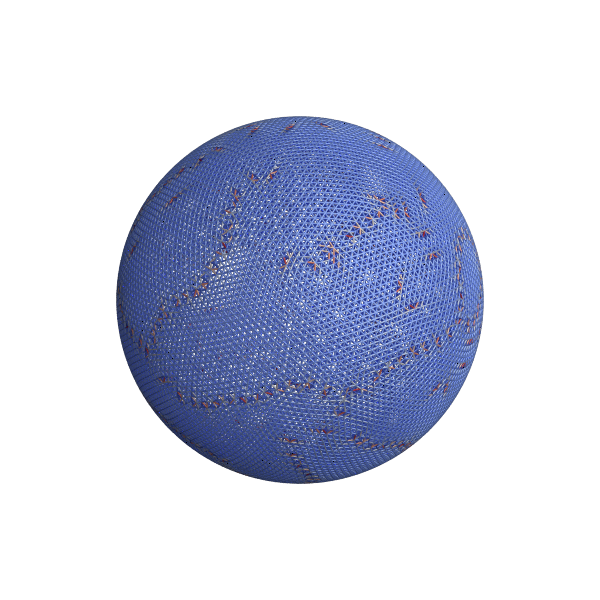

In [8]:
# That new mesh seems much better behaved! 
# Dislocation lines ("scars") still necessarily remain, as imposed by Euler's formula (https://en.wikipedia.org/wiki/Euler_characteristic) 
render.fresnel(snapshot_thomson, outline=0, show_strains=True, cmap='coolwarm').static()